In [1]:
import pandas as pd
import numpy as np
import itertools
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import acquire
import prepare
import explore
import model

In [2]:
acquire.print_libs()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pydataset import data
import os
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from scipy import stats
import warnings

Goal for this notebook will be to generate 10-20 models per algorithm and then compare those to the baseline and each other.
- [x] Split dataset
- [x] Split into X sets
- [x] Split into y sets
- [ ] Create function to split into X and y sets
- [ ] Create for loop to run through each test
- [ ] Create function that generates DataFrame of the models
- [ ] Isolate best scoring models per algorithm (base off train/validate difference)
- [ ] Create function to return best model
- [ ] Add to model.py

In [5]:
# import dataset
raw_telco = acquire.get_telco_data()
acquire.df_info(raw_telco)

Reading from file...


,nunique,dtypes,isnull,1932
payment_type_id,4,int64,0,2
internet_service_type_id,3,int64,0,3
contract_type_id,3,int64,0,3
customer_id,7043,object,0,2808-CHTDM
gender,2,object,0,Female
senior_citizen,2,int64,0,0
partner,2,object,0,Yes
dependents,2,object,0,Yes
tenure,73,int64,0,23
phone_service,2,object,0,Yes


In [6]:
# prepare dataset
telco = prepare.prep_telco(raw_telco)
acquire.df_info(telco)

,nunique,dtypes,isnull,4832-VRBMR
gender,2,object,0,Male
senior_citizen,2,object,0,Yes
married,2,object,0,Yes
children,2,object,0,No
tenure_months,73,int64,0,65
paperless_billing,2,object,0,Yes
monthly_charges,1585,float64,0,103.15
total_charges,6531,float64,0,6792.45
churn,2,object,0,No
contract_type,3,object,0,One year


In [7]:
# split dataset
tvt_set = train,validate,test = prepare.split_df(telco,'churn')
[print(set.shape) for set in tvt_set]

acquire.df_info(train)

(4225, 16)
(1409, 16)
(1409, 16)


,nunique,dtypes,isnull,8111-BKVDS
gender,2,object,0,Female
senior_citizen,2,object,0,No
married,2,object,0,No
children,2,object,0,No
tenure_months,73,int64,0,10
paperless_billing,2,object,0,No
monthly_charges,1374,float64,0,40.7
total_charges,4006,float64,0,449.3
churn,2,object,0,No
contract_type,3,object,0,Month-to-month


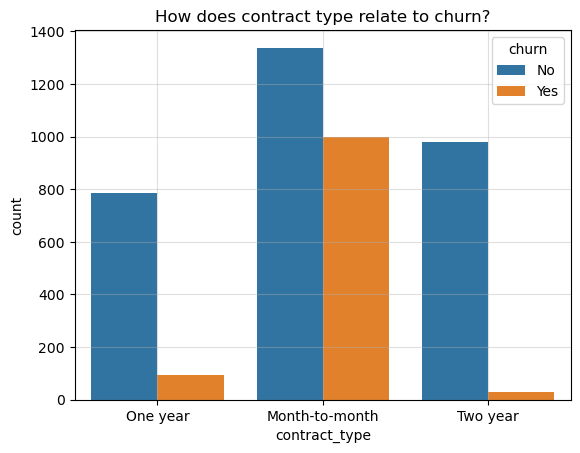

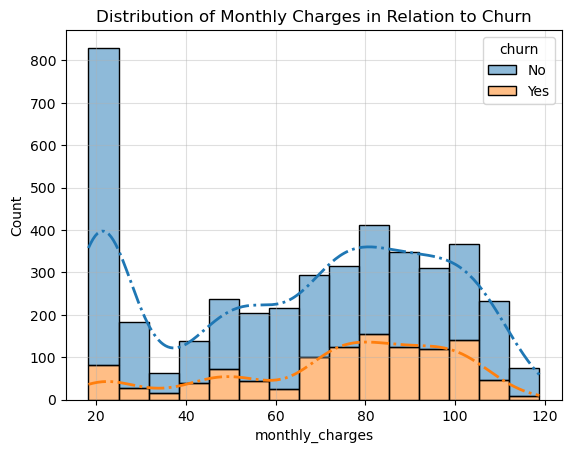

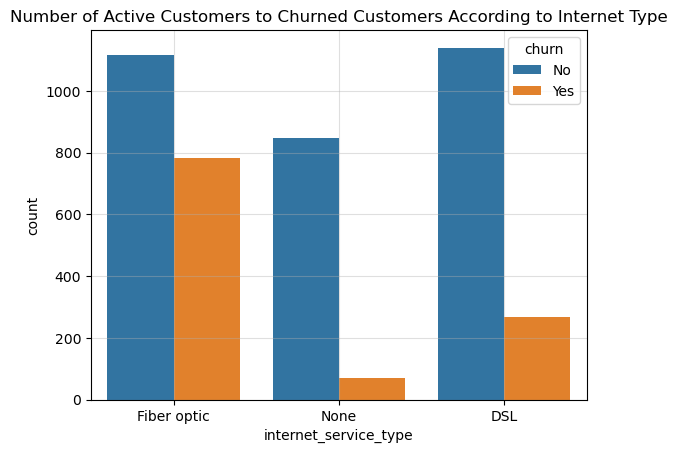

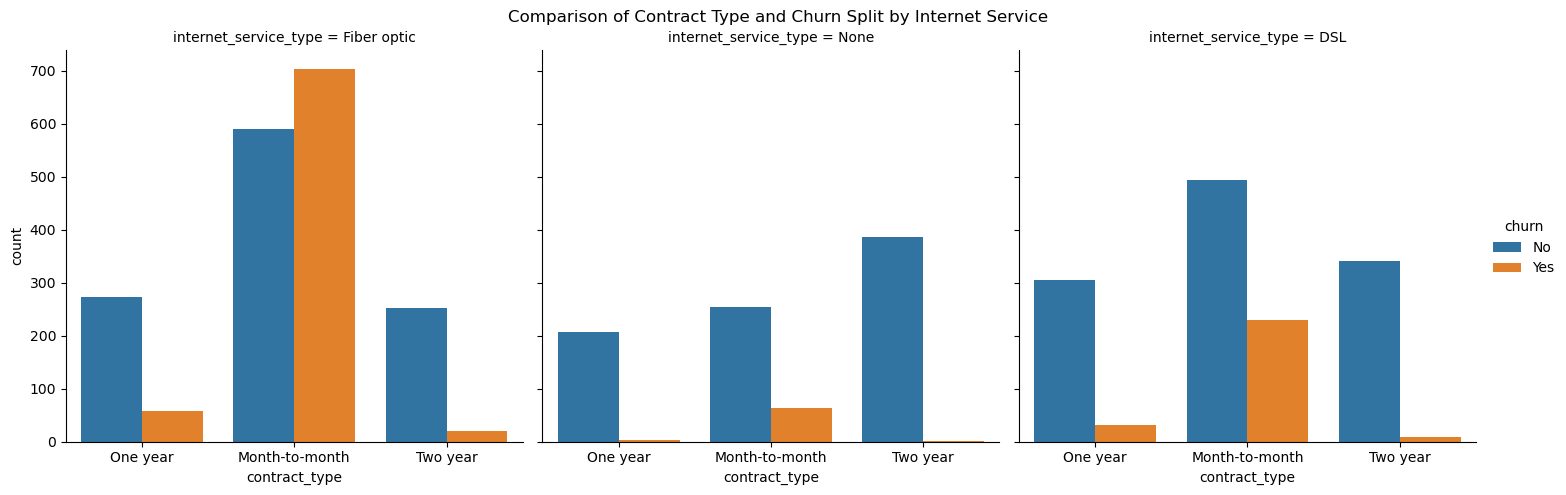

In [8]:
# plot train
explore.telco_plots(train)

In [9]:
# drop extra columns
acquire.df_info(train)

,nunique,dtypes,isnull,3352-ALMCK
gender,2,object,0,Male
senior_citizen,2,object,0,No
married,2,object,0,No
children,2,object,0,No
tenure_months,73,int64,0,40
paperless_billing,2,object,0,Yes
monthly_charges,1374,float64,0,102.65
total_charges,4006,float64,0,4108.15
churn,2,object,0,No
contract_type,3,object,0,Month-to-month


In [10]:
prepare.drop_cols(train,extras=True,cols=['total_charges','payment_type'],degree=7)

,tenure_months,paperless_billing,monthly_charges,churn,contract_type,internet_service_type,streaming,protection,support
customer_id,,,,,,,,,
4083-BFNYK,38,No,95.00,No,One year,Fiber optic,Movies,Online Security,Online Backup
5804-LEPIM,2,Yes,70.35,Yes,Month-to-month,Fiber optic,Neither,Neither,Neither
4895-TMWIR,11,No,19.95,Yes,Month-to-month,None,No internet service,No internet service,No internet service
1342-JPNKI,10,Yes,86.05,Yes,Month-to-month,Fiber optic,TV,Neither,Neither
3397-AVTKU,43,Yes,60.00,No,Two year,DSL,Movies,Neither,Online Backup
...,...,...,...,...,...,...,...,...,...
1915-IOFGU,1,No,70.50,Yes,Month-to-month,Fiber optic,Neither,Neither,Neither
7025-WCBNE,47,No,59.60,No,Two year,DSL,Neither,Neither,Both
9788-HNGUT,72,Yes,116.95,No,Two year,Fiber optic,Both,Both,Both


In [11]:
filtered = f_train,f_validate,f_test = [prepare.drop_cols(set_,extras=True,cols=['total_charges','payment_type'],degree=7)
 for set_ in tvt_set
]

acquire.df_info(f_train)

,nunique,dtypes,isnull,8468-FZTOE
tenure_months,73,int64,0,72
paperless_billing,2,object,0,Yes
monthly_charges,1374,float64,0,74.35
churn,2,object,0,No
contract_type,3,object,0,Two year
internet_service_type,3,object,0,DSL
streaming,5,object,0,Movies
protection,5,object,0,Both
support,5,object,0,Both


In [12]:
# encode dataset
model.encode_df(f_train,'churn')

,tenure_months,monthly_charges,churn,paperless_billing_is_Yes,contract_type_is_One year,contract_type_is_Two year,internet_service_type_is_Fiber optic,internet_service_type_is_None,streaming_is_Movies,streaming_is_Neither,streaming_is_No internet service,streaming_is_TV,protection_is_Device Protection,protection_is_Neither,protection_is_No internet service,protection_is_Online Security,support_is_Neither,support_is_No internet service,support_is_Online Backup,support_is_Tech Support
customer_id,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,38,95.00,No,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5804-LEPIM,2,70.35,Yes,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4895-TMWIR,11,19.95,Yes,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1342-JPNKI,10,86.05,Yes,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3397-AVTKU,43,60.00,No,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915-IOFGU,1,70.50,Yes,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7025-WCBNE,47,59.60,No,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9788-HNGUT,72,116.95,No,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
encoded = e_train,e_validate,e_test = [model.encode_df(set_,'churn') for set_ in filtered]

acquire.df_info(e_train)

,nunique,dtypes,isnull,5997-OPVFA
tenure_months,73,int64,0,72
monthly_charges,1374,float64,0,89.05
churn,2,object,0,No
paperless_billing_is_Yes,2,float64,0,1.0
contract_type_is_One year,2,float64,0,0.0
contract_type_is_Two year,2,float64,0,1.0
internet_service_type_is_Fiber optic,2,float64,0,0.0
internet_service_type_is_None,2,float64,0,0.0
streaming_is_Movies,2,float64,0,0.0
streaming_is_Neither,2,float64,0,0.0


In [14]:
# split X sets
e_train.drop(columns='churn')

,tenure_months,monthly_charges,paperless_billing_is_Yes,contract_type_is_One year,contract_type_is_Two year,internet_service_type_is_Fiber optic,internet_service_type_is_None,streaming_is_Movies,streaming_is_Neither,streaming_is_No internet service,streaming_is_TV,protection_is_Device Protection,protection_is_Neither,protection_is_No internet service,protection_is_Online Security,support_is_Neither,support_is_No internet service,support_is_Online Backup,support_is_Tech Support
customer_id,,,,,,,,,,,,,,,,,,,
4083-BFNYK,38,95.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5804-LEPIM,2,70.35,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4895-TMWIR,11,19.95,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1342-JPNKI,10,86.05,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3397-AVTKU,43,60.00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915-IOFGU,1,70.50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7025-WCBNE,47,59.60,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9788-HNGUT,72,116.95,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X_sets = X_train,X_validate,X_test = [set_.drop(columns='churn') for set_ in encoded]

acquire.df_info(X_train)

,nunique,dtypes,isnull,7245-NIIWQ
tenure_months,73,int64,0,3.00
monthly_charges,1374,float64,0,69.85
paperless_billing_is_Yes,2,float64,0,1.00
contract_type_is_One year,2,float64,0,0.00
contract_type_is_Two year,2,float64,0,0.00
internet_service_type_is_Fiber optic,2,float64,0,1.00
internet_service_type_is_None,2,float64,0,0.00
streaming_is_Movies,2,float64,0,0.00
streaming_is_Neither,2,float64,0,1.00
streaming_is_No internet service,2,float64,0,0.00


In [16]:
# split y sets
y_sets = y_train,y_validate,y_test = [set_.churn for set_ in encoded]

y_train.head()

customer_id
4083-BFNYK     No
5804-LEPIM    Yes
4895-TMWIR    Yes
1342-JPNKI    Yes
3397-AVTKU     No
Name: churn, dtype: object

In [17]:
# get baseline
y_train.value_counts()

churn
No     3104
Yes    1121
Name: count, dtype: int64

In [18]:
baseline = y_train.mode()[0]
baseline

'No'

In [19]:
# get baseline accuracy
baseline_acc = (baseline == y_train).mean()
baseline_acc

0.7346745562130178

In [20]:
# Set random_state
r_parameter = 123

In [21]:
# run decision tree
clf = DecisionTreeClassifier(max_depth=1)
clf

DecisionTreeClassifier(max_depth=1)

In [22]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [23]:
clf.score(X_train,y_train)

0.7358579881656805

In [24]:
clf.predict(X_train)

array(['No', 'Yes', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [25]:
# test creating model dictionary
clf_y_pred = {
    'actual':y_train,
    'baseline':baseline,
    'model':clf.predict(X_train)
}

pd.DataFrame(clf_y_pred)

,actual,baseline,model
customer_id,,,
4083-BFNYK,No,No,No
5804-LEPIM,Yes,No,Yes
4895-TMWIR,Yes,No,No
1342-JPNKI,Yes,No,Yes
3397-AVTKU,No,No,No
...,...,...,...
1915-IOFGU,Yes,No,Yes
7025-WCBNE,No,No,No
9788-HNGUT,No,No,No


In [26]:
# loop decision tree
clf = [DecisionTreeClassifier(max_depth=i+1,) for i in range(20)]
clf

[DecisionTreeClassifier(max_depth=1),
 DecisionTreeClassifier(max_depth=2),
 DecisionTreeClassifier(max_depth=3),
 DecisionTreeClassifier(max_depth=4),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=6),
 DecisionTreeClassifier(max_depth=7),
 DecisionTreeClassifier(max_depth=8),
 DecisionTreeClassifier(max_depth=9),
 DecisionTreeClassifier(max_depth=10),
 DecisionTreeClassifier(max_depth=11),
 DecisionTreeClassifier(max_depth=12),
 DecisionTreeClassifier(max_depth=13),
 DecisionTreeClassifier(max_depth=14),
 DecisionTreeClassifier(max_depth=15),
 DecisionTreeClassifier(max_depth=16),
 DecisionTreeClassifier(max_depth=17),
 DecisionTreeClassifier(max_depth=18),
 DecisionTreeClassifier(max_depth=19),
 DecisionTreeClassifier(max_depth=20)]

In [27]:
for model in clf:
    model.fit(X_train,y_train)

In [28]:
for model in clf:
    # print(model.score(X_train,y_train))
    train_acc = model.score(X_train,y_train)
    val_acc = model.score(X_validate,y_validate)
    
    print(train_acc - val_acc)

0.010520869641904795
-0.004124121770024414
-0.00223063064576412
0.009601673098970753
0.014098042591791482
0.02214705968814179
0.026880787498792635
0.04321181248188943
0.07586579932051352
0.10142356197059477
0.1366824429596717
0.14828209187765884
0.17052826084217687
0.1799970603180736
0.19869192553365722
0.20200755078300525
0.21454957773568906
0.22709160468837275
0.23679373091831457
0.2412904363747842


In [29]:
# TO DO:
# create dictionary holding model w/number, the train accuracy, the validate accuracy, and the depth
# turn dictionary into dataframe, then add on difference in accuracy and the average
# plot it!
# perfect it, turn it into a function with a nice sticker

In [30]:
# create list to hold stats
metrics = []

for i in range(20):
    # print(i+1)
    model = DecisionTreeClassifier(max_depth=i+1,random_state=r_parameter)
    
    model.fit(X_train,y_train)
    
    output = {
        'model':model,
        'train_acc':model.score(X_train,y_train),
        'validate_acc':model.score(X_validate,y_validate),
        'hyperparameters':'max_depth='+str(i+1)
    }
    
    metrics.append(output)

dt_metrics = pd.DataFrame(metrics)
dt_metrics['difference'] = dt_metrics.train_acc - dt_metrics.validate_acc
dt_metrics['average'] = dt_metrics[['train_acc','validate_acc']].mean(axis=1)

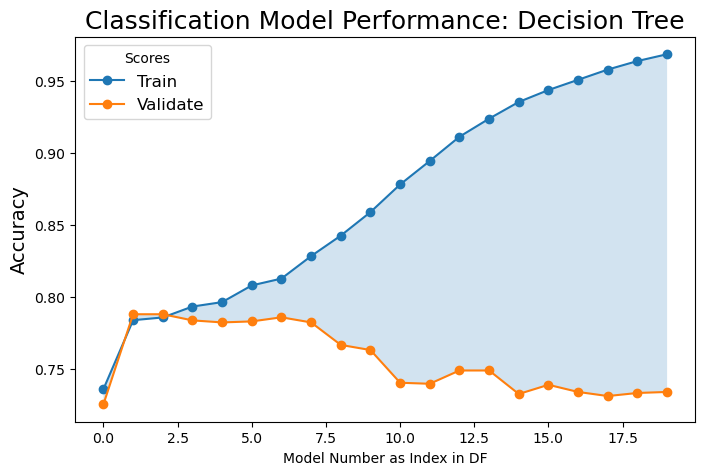

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(dt_metrics.index, dt_metrics.train_acc, label="Train", marker="o")
plt.plot(dt_metrics.index, dt_metrics.validate_acc, label="Validate", marker="o")
plt.fill_between(dt_metrics.index, dt_metrics.train_acc, dt_metrics.validate_acc, alpha=0.2)
plt.xlabel("Model Number as Index in DF", fontsize=10)
plt.ylabel("Accuracy", fontsize=14)
plt.title(f"Classification Model Performance: Decision Tree", fontsize=18)
plt.legend(title="Scores", fontsize=12)
plt.show()

In [32]:
# drop anything below baseline
dt_metrics = dt_metrics[dt_metrics.validate_acc > baseline_acc]

# drop anything with a difference bigger than 0.1
dt_metrics = dt_metrics[dt_metrics.difference.round(1) < dt_metrics.difference.round(1).max()]

# drop anything with an average less than average rounded to 1 decimal
dt_metrics = dt_metrics[dt_metrics.average >= dt_metrics.average.round(1)]

# drop rows that are less than or equal to the validate mean
dt_metrics = dt_metrics[dt_metrics.validate_acc > dt_metrics.validate_acc.mean()]

dt_metrics.sort_values(['difference','validate_acc','train_acc'],ascending=[True,False,False])[:3]

,model,train_acc,validate_acc,hyperparameters,difference,average
7,"DecisionTreeClassifier(max_depth=8, random_state=123)",0.828166,0.782115,max_depth=8,0.046051,0.805140
8,"DecisionTreeClassifier(max_depth=9, random_state=123)",0.842367,0.766501,max_depth=9,0.075866,0.804434


In [33]:
# top_models = metrics
# top_models

In [34]:
# run random forest
rf = RandomForestClassifier(max_depth=1)

In [35]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=1)

In [36]:
rf.score(X_train,y_train)

0.7346745562130178

In [37]:
# loop random forest
metrics = []

for i in range(20):
    # print(i+1)
    model = RandomForestClassifier(max_depth=i+1,random_state=r_parameter)
    
    model.fit(X_train,y_train)
    
    output = {
        'model':model,
        'train_acc':model.score(X_train,y_train),
        'validate_acc':model.score(X_validate,y_validate),
        'hyperparameters':'max_depth='+str(i+1)
    }
    
    metrics.append(output)

rf_metrics = pd.DataFrame(metrics)
rf_metrics['difference'] = rf_metrics.train_acc - rf_metrics.validate_acc
rf_metrics['average'] = rf_metrics[['train_acc','validate_acc']].mean(axis=1)

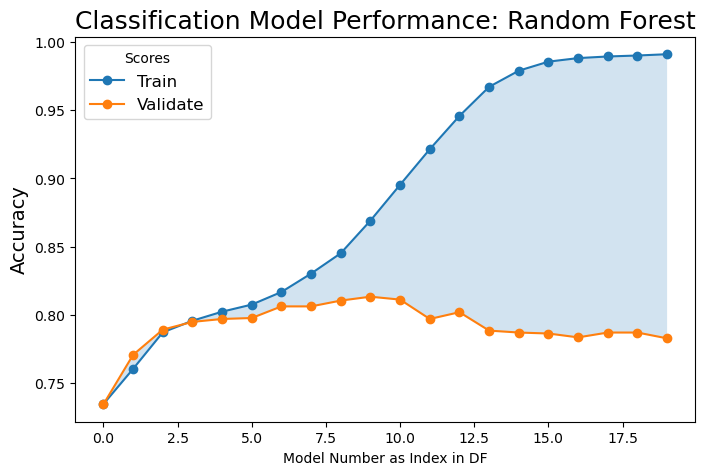

In [38]:
plt.figure(figsize=(8, 5))
plt.plot(rf_metrics.index, rf_metrics.train_acc, label="Train", marker="o")
plt.plot(rf_metrics.index, rf_metrics.validate_acc, label="Validate", marker="o")
plt.fill_between(rf_metrics.index, rf_metrics.train_acc, rf_metrics.validate_acc, alpha=0.2)
plt.xlabel("Model Number as Index in DF", fontsize=10)
plt.ylabel("Accuracy", fontsize=14)
plt.title(f"Classification Model Performance: Random Forest", fontsize=18)
plt.legend(title="Scores", fontsize=12)
plt.show()

In [39]:
# drop anything below baseline
rf_metrics = rf_metrics[rf_metrics.validate_acc > baseline_acc]

# drop anything with a difference bigger than 0.1
rf_metrics = rf_metrics[rf_metrics.difference.round(1) < rf_metrics.difference.round(1).max()]

# drop anything with an average less than average rounded to 1 decimal
rf_metrics = rf_metrics[rf_metrics.average >= rf_metrics.average.round(1)]

# drop rows that are less than or equal to the validate mean
rf_metrics = rf_metrics[rf_metrics.validate_acc > rf_metrics.validate_acc.mean()]

rf_metrics.sort_values(['difference','validate_acc','train_acc'],ascending=[True,False,False])[:3]

,model,train_acc,validate_acc,hyperparameters,difference,average
8,"(DecisionTreeClassifier(max_depth=9, max_features='sqrt', random_state=843828734), Dec...",0.845207,0.810504,max_depth=9,0.034703,0.827856
9,"(DecisionTreeClassifier(max_depth=10, max_features='sqrt',\n ran...",0.869112,0.813343,max_depth=10,0.055770,0.841228


In [40]:
# top_models + metrics

In [41]:
# run KNN
knn = KNeighborsClassifier()

In [42]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
knn.score(np.ascontiguousarray(X_train),y_train)

0.834792899408284

In [44]:
# loop KNN
metrics = []

for i in range(20):
    # print(i+1)
    model = KNeighborsClassifier(n_neighbors=i+1)
    
    model.fit(X_train,y_train)
    
    output = {
        'model':model,
        'train_acc':model.score(np.ascontiguousarray(X_train),y_train),
        'validate_acc':model.score(np.ascontiguousarray(X_validate),y_validate),
        'hyperparameters':'n_neighbors='+str(i+1)
    }
    
    metrics.append(output)

knn_metrics = pd.DataFrame(metrics)
knn_metrics['difference'] = knn_metrics.train_acc - knn_metrics.validate_acc
knn_metrics['average'] = knn_metrics[['train_acc','validate_acc']].mean(axis=1)

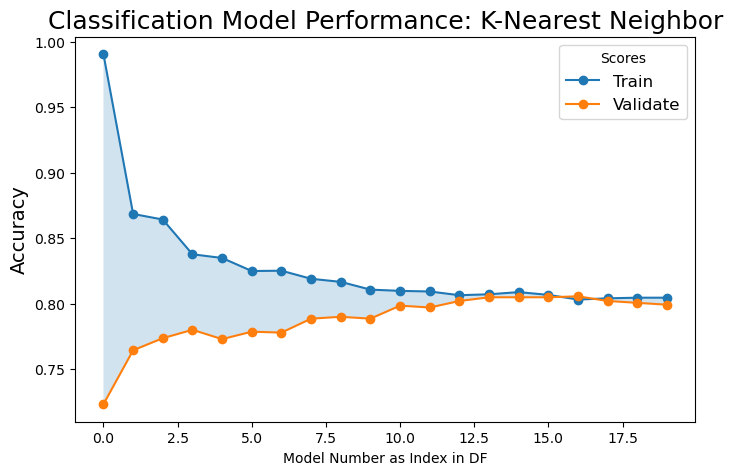

In [45]:
plt.figure(figsize=(8, 5))
plt.plot(knn_metrics.index, knn_metrics.train_acc, label="Train", marker="o")
plt.plot(knn_metrics.index, knn_metrics.validate_acc, label="Validate", marker="o")
plt.fill_between(knn_metrics.index, knn_metrics.train_acc, knn_metrics.validate_acc, alpha=0.2)
plt.xlabel("Model Number as Index in DF", fontsize=10)
plt.ylabel("Accuracy", fontsize=14)
plt.title(f"Classification Model Performance: K-Nearest Neighbor", fontsize=18)
plt.legend(title="Scores", fontsize=12)
plt.show()

In [46]:
# drop anything below baseline
knn_metrics = knn_metrics[knn_metrics.validate_acc > baseline_acc]

# drop anything with a difference bigger than 0.1
knn_metrics = knn_metrics[knn_metrics.difference.round(1) < knn_metrics.difference.round(1).max()]

# drop anything with an average less than average rounded to 1 decimal
knn_metrics = knn_metrics[knn_metrics.average >= knn_metrics.average.round(1)]

# drop rows that are less than or equal to the validate mean
knn_metrics = knn_metrics[knn_metrics.validate_acc > knn_metrics.validate_acc.mean()]

knn_metrics.sort_values(['difference','validate_acc','train_acc'],ascending=[True,False,False])[:3]

,model,train_acc,validate_acc,hyperparameters,difference,average
16,KNeighborsClassifier(n_neighbors=17),0.803077,0.805536,n_neighbors=17,-0.002459,0.804306
15,KNeighborsClassifier(n_neighbors=16),0.806627,0.804826,n_neighbors=16,0.001801,0.805727
17,KNeighborsClassifier(n_neighbors=18),0.804024,0.801987,n_neighbors=18,0.002036,0.803005


In [47]:
# run logistic regression
lr = LogisticRegression()

In [48]:
lr.fit(X_train,y_train)

LogisticRegression()

In [49]:
lr.score(X_train,y_train)

0.7964497041420119

In [50]:
for i in range(20,0,-1):
    print(i/10)

2.0
1.9
1.8
1.7
1.6
1.5
1.4
1.3
1.2
1.1
1.0
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1


In [51]:
# loop logistic regression
metrics = []

for i in range(20,0,-1):
    model = LogisticRegression(C=(i),random_state=r_parameter)
    
    model.fit(X_train,y_train)
    
    output = {
        'model':model,
        'train_acc':model.score(X_train,y_train),
        'validate_acc':model.score(X_validate,y_validate),
        'hyperparameters':'C='+str(i)
    }
    
    metrics.append(output)

lr_metrics = pd.DataFrame(metrics)
lr_metrics['difference'] = lr_metrics.train_acc - lr_metrics.validate_acc
lr_metrics['average'] = lr_metrics[['train_acc','validate_acc']].mean(axis=1)

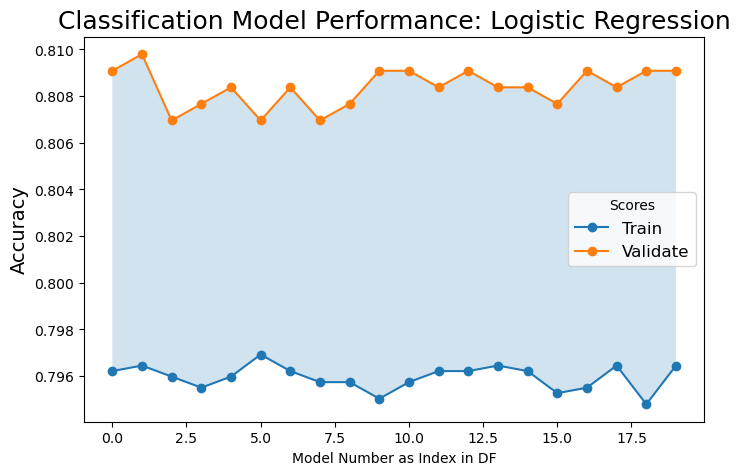

In [52]:
plt.figure(figsize=(8, 5))
plt.plot(lr_metrics.index, lr_metrics.train_acc, label="Train", marker="o")
plt.plot(lr_metrics.index, lr_metrics.validate_acc, label="Validate", marker="o")
plt.fill_between(lr_metrics.index, lr_metrics.train_acc, lr_metrics.validate_acc, alpha=0.2)
plt.xlabel("Model Number as Index in DF", fontsize=10)
plt.ylabel("Accuracy", fontsize=14)
plt.title(f"Classification Model Performance: Logistic Regression", fontsize=18)
plt.legend(title="Scores", fontsize=12)
plt.show()

In [53]:
# drop anything below baseline
lr_metrics = lr_metrics[lr_metrics.validate_acc > baseline_acc]

# drop anything with a difference bigger than 0.1
lr_metrics = lr_metrics[lr_metrics.difference.round(1) < lr_metrics.difference.round(1).max()]

# drop anything with an average less than average rounded to 1 decimal
lr_metrics = lr_metrics[lr_metrics.average >= lr_metrics.average.round(1)]

# drop rows that are less than or equal to the validate mean
lr_metrics = lr_metrics[lr_metrics.validate_acc > lr_metrics.validate_acc.mean()]

lr_metrics.sort_values(['difference','validate_acc','train_acc'],ascending=[True,False,False])[:3]

,model,train_acc,validate_acc,hyperparameters,difference,average
